# Implementation of K-Nearest Neighbors from Scratch :

### Import libraries :

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error, explained_variance_score, mean_absolute_error, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

### Define KNN Class :

In [30]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train.astype(float)
        self.y_train = y_train

    def predict(self, X_test):
        X_test = np.array(X_test).astype(float)
        predictions = []
        for x in X_test:
            x = x.astype(float)
            distances = np.linalg.norm(self.X_train - x, axis=1)
            nearest_neighbors = np.argsort(distances)[:self.k]
            neighbor_labels = self.y_train[nearest_neighbors]
            unique_labels, counts = np.unique(neighbor_labels, return_counts=True)
            predicted_label = unique_labels[np.argmax(counts)]
            predictions.append(predicted_label)
        return np.array(predictions)

#----------------------------

class KNNRegressor:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            nearest_neighbors = np.argsort(distances)[:self.k]
            neighbor_values = self.y_train[nearest_neighbors]
            predicted_value = np.mean(neighbor_values)
            predictions.append(predicted_value)
        return np.array(predictions)

### Classification example : 
#### - Load data & prepare it :

In [16]:
iris_data = sns.load_dataset("iris")

iris_data.head(8)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa


In [32]:
X = iris_data.drop(columns=["species"])
y = iris_data["species"]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=40)

print(X_train.shape)
print(X_test.shape)
print(y_test[:5])
X_test.head()

(112, 4)
(38, 4)
[0 1 2 2 1]


,sepal_length,sepal_width,petal_length,petal_width
38,4.4,3.0,1.3,0.2
66,5.6,3.0,4.5,1.5
115,6.4,3.2,5.3,2.3
117,7.7,3.8,6.7,2.2
89,5.5,2.5,4.0,1.3


#### - Train and evaluate my KNN model  : 

Accuracy: 1.00
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



<Axes: >

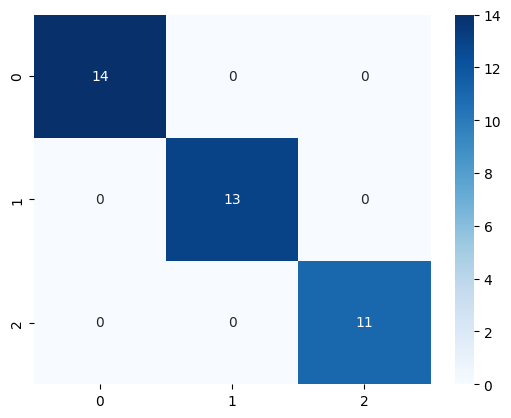

In [43]:
# Creating and training the KNN model
knn_model = KNNClassifier(k=3)
knn_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred1 = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy:.2f}")

print(f"classification_report: {classification_report(y_test, y_pred1)}")

cm = confusion_matrix(y_pred1, y_test)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues') 

#### - Train and evaluate sklearn KNN model  : 

Accuracy: 1.0
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



<Axes: >

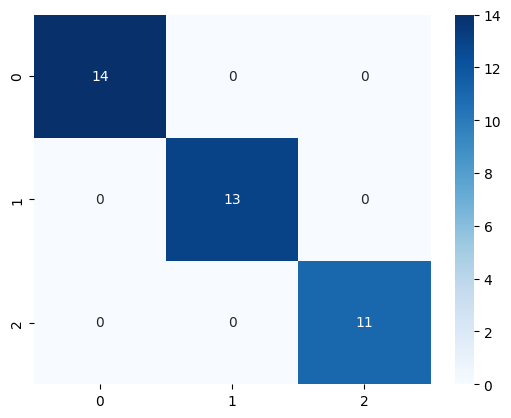

In [44]:
knn = KNeighborsClassifier(n_neighbors=3)  # Using 3 neighbors for demonstration

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred2 = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

print(f"classification_report: {classification_report(y_test, y_pred2)}")

cm = confusion_matrix(y_pred2, y_test)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues') 

### Regression example : 
#### - Load data & prepare it :

In [39]:
# load dataset from seaborn
dataset2 = sns.load_dataset('tips')

# dataset infos
print("dataset shape : ", dataset2.shape)
print("tips dataset labels : ", list(dataset2.columns))
dataset2.head()

dataset shape :  (244, 7)
tips dataset labels :  ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
# Assuming df is your DataFrame and 'ordinal_column' is the name of the ordinal column
ordinal_column = ['sex', 'smoker', 'day', 'time']

# Use LabelEncoder to perform label encoding
label_encoder = LabelEncoder()
for i in ordinal_column:
    dataset2[i] = label_encoder.fit_transform(dataset2[i])

pd.DataFrame(dataset2).head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [41]:
X2 = dataset2.drop("tip", axis = 1).values
y2 = dataset2["tip"].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)

pd.DataFrame(X_train2).head()

,0,1,2,3,4,5
0,17.31,0.0,0.0,2.0,0.0,2.0
1,23.33,1.0,1.0,2.0,0.0,2.0
2,16.27,0.0,1.0,0.0,1.0,2.0
3,20.23,1.0,0.0,1.0,0.0,2.0
4,20.92,0.0,0.0,1.0,0.0,2.0


#### - Train and evaluate my KNN model  : 

In [47]:
knn_reg1 = KNNRegressor(k=3)
knn_reg1.fit(X_train2, y_train2)
pred1 = knn_reg1.predict(X_test2)
# ============ validation ================
print("R² :", r2_score(y_test2, pred1))
print("mean_squared_error :", mean_squared_error(y_test2, pred1))
print("mean_absolute_error :", mean_absolute_error(y_test2, pred1))
print("explained_variance_score :", explained_variance_score(y_test2, pred1))

R² : 0.09393979887669168
mean_squared_error : 1.2054449908925318
mean_absolute_error : 0.8153551912568305
explained_variance_score : 0.09576183532414484


#### - Train and evaluate sklearn KNN model  : 

In [49]:
knn_reg2 = KNeighborsRegressor(n_neighbors=3)
knn_reg2.fit(X_train2, y_train2)
predicted2 = knn_reg2.predict(X_test2)
# ============ validation ================
print("R² :", r2_score(y_test2, predicted2))
print("mean_squared_error :", mean_squared_error(y_test2, predicted2))
print("mean_absolute_error :", mean_absolute_error(y_test2, predicted2))
print("explained_variance_score :", explained_variance_score(y_test2, predicted2))

R² : 0.09393979887669168
mean_squared_error : 1.2054449908925318
mean_absolute_error : 0.8153551912568305
explained_variance_score : 0.09576183532414484
